In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import seaborn as sns
import os

In [20]:
Train_dir = 'C:/Users/Hrishikesh M Rao/Documents/archive (1)/ck/CK+48'
emotions_loc = 'C:/Users/Hrishikesh M Rao/Documents/archive (1)/ck/CK+48'

In [77]:
images = []
labels = []
i=0
for emotions in os.listdir(Train_dir):
    emotion_path = os.path.join(emotions_loc,emotions)
    for filename in os.listdir(emotion_path):
        if filename.endswith('.png'):
            image_path = os.path.join(emotion_path, filename)
            image = Image.open(image_path)
            desired_size = (224, 224)
            image = image.resize(desired_size)
            image = np.array(image)
            image = image / 255.0
            images.append(image)
            label = np.zeros(7)
            label[i] = 1
            labels.append(label)
    i+=1       

The shape of the images list is = (981, 224, 224)
The size of the images list is = 49222656
[1. 0. 0. 0. 0. 0. 0.]


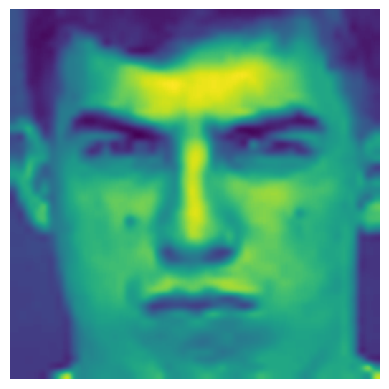

In [78]:
print("The shape of the images list is = "+str(np.shape(images)))
print("The size of the images list is = "+str(np.size(images)))

print(labels[i])
i = 98 
plt.imshow(images[i])
plt.axis('off')  # Hide axis labels and ticks
plt.show()


## Reshape the images and label matrix as necessary

In [79]:

images = np.transpose(images, (1, 2, 0))
images = images.reshape(224*224,981)
labels = np.array(labels)
labels = np.transpose(labels,(1,0))

# Shuffle the dataset
num_samples = images.shape[1]
indices = np.arange(num_samples)
np.random.shuffle(indices)
images = images[:,indices]
labels = labels[:,indices]



[0. 0. 1. 0. 0. 0. 0.]


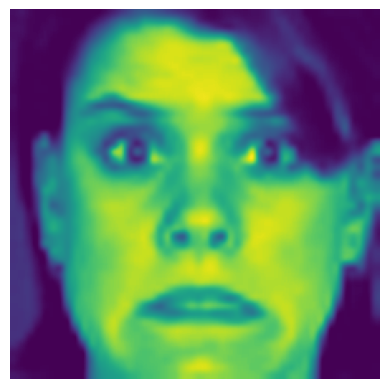

In [84]:
print(labels[:,i])
i = 1  # Change this to the index of the image you want to plot

# Select the column corresponding to the ith image
selected_image = images[:, i]

# Reshape the selected image back to its original shape (224x224)
original_shape_image = selected_image.reshape(224, 224)

plt.imshow(original_shape_image)
plt.axis('off')  # Hide axis labels and ticks
plt.show()

## Normalizer

In [81]:
def Normalise(parameter):

    mean = np.mean(parameter)
    std = np.std(parameter)
    parameter = (parameter-mean)/(std)
    
    return parameter

def MinMax(parameter):
    
    min = np.min(parameter)
    max = np.max(parameter)
    deviation = max - min
    parameter = (parameter-min)/(deviation)
    
    return parameter

In [131]:
images = Normalise(images)
images = MinMax(images)

images_Df=pd.DataFrame(images)
labels_Df=pd.DataFrame(labels)
images_Df

,0,1,2,3,4,5,6,7,8,9,...,971,972,973,974,975,976,977,978,979,980
0,0.517647,0.031373,0.215686,0.447059,0.152941,0.831373,0.862745,0.156863,0.650980,0.447059,...,0.247059,0.003922,0.113725,0.282353,0.215686,0.870588,0.121569,0.658824,0.329412,0.066667
1,0.505882,0.031373,0.215686,0.443137,0.152941,0.823529,0.862745,0.156863,0.639216,0.443137,...,0.243137,0.003922,0.109804,0.278431,0.211765,0.858824,0.121569,0.650980,0.329412,0.070588
2,0.486275,0.031373,0.211765,0.443137,0.149020,0.811765,0.862745,0.152941,0.615686,0.435294,...,0.223529,0.003922,0.105882,0.278431,0.211765,0.831373,0.121569,0.647059,0.329412,0.070588
3,0.447059,0.035294,0.207843,0.435294,0.141176,0.792157,0.862745,0.149020,0.576471,0.423529,...,0.200000,0.003922,0.090196,0.278431,0.207843,0.784314,0.121569,0.635294,0.329412,0.078431
4,0.392157,0.039216,0.203922,0.427451,0.133333,0.768627,0.862745,0.145098,0.521569,0.407843,...,0.160784,0.003922,0.066667,0.278431,0.207843,0.713725,0.121569,0.615686,0.329412,0.086275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50171,0.258824,0.000000,0.215686,0.501961,0.325490,0.733333,0.611765,0.207843,0.137255,0.427451,...,0.290196,0.188235,0.019608,0.658824,1.000000,0.109804,0.305882,0.309804,0.321569,0.345098
50172,0.262745,0.000000,0.215686,0.501961,0.321569,0.733333,0.611765,0.207843,0.145098,0.431373,...,0.286275,0.188235,0.015686,0.666667,1.000000,0.105882,0.266667,0.301961,0.325490,0.345098
50173,0.266667,0.000000,0.215686,0.498039,0.321569,0.733333,0.611765,0.207843,0.152941,0.431373,...,0.282353,0.188235,0.019608,0.670588,1.000000,0.105882,0.243137,0.298039,0.325490,0.345098
50174,0.266667,0.000000,0.215686,0.498039,0.321569,0.733333,0.611765,0.207843,0.156863,0.431373,...,0.282353,0.188235,0.019608,0.678431,1.000000,0.105882,0.227451,0.294118,0.325490,0.345098


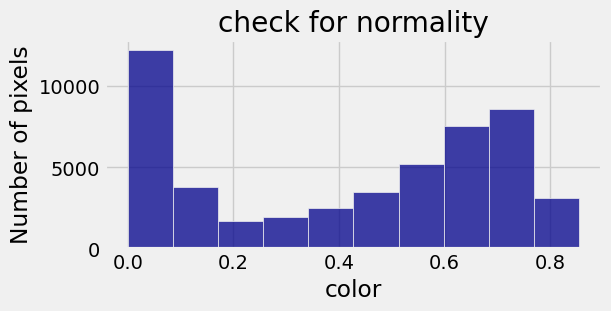

In [132]:

import matplotlib.style as style
style.use('fivethirtyeight')

fig = plt.figure(constrained_layout=True, figsize=(6,3))
sns.histplot(images_Df.loc[:,1], kde=False, color='darkblue', bins=10)
plt.xlabel('color')  # Add a label to the x-axis.
plt.ylabel('Number of pixels')  # Add a label to the y-axis.
plt.title('check for normality')  # Add a title to the plot.

plt.show()


In [121]:
images_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50176 entries, 0 to 50175
Columns: 981 entries, 0 to 980
dtypes: float64(981)
memory usage: 375.5 MB


In [114]:
images_Df.describe()

,0,1,2,3,4,5,6,7,8,9,...,971,972,973,974,975,976,977,978,979,980
count,50176.000000,50176.000000,50176.000000,50176.000000,50176.000000,50176.000000,50176.000000,50176.000000,50176.000000,50176.000000,...,50176.000000,50176.000000,50176.000000,50176.000000,50176.000000,50176.000000,50176.000000,50176.000000,50176.000000,50176.000000
mean,0.539562,0.413278,0.493712,0.761067,0.519513,0.424999,0.495712,0.389104,0.731297,0.527619,...,0.566208,0.440801,0.155461,0.670197,0.499748,0.346994,0.446632,0.421225,0.601015,0.621885
std,0.255608,0.288688,0.261382,0.240025,0.261844,0.160459,0.152635,0.229623,0.300736,0.203091,...,0.288059,0.212215,0.126975,0.268163,0.201598,0.234496,0.284106,0.138746,0.259112,0.290991
min,0.000000,0.000000,0.000000,0.039216,0.000000,0.078431,0.074510,0.000000,0.023529,0.152941,...,0.000000,0.000000,0.000000,0.094118,0.019608,0.000000,0.003922,0.070588,0.015686,0.000000
25%,0.309804,0.090196,0.235294,0.545098,0.317647,0.321569,0.411765,0.192157,0.525490,0.368627,...,0.317647,0.294118,0.047059,0.439216,0.349020,0.145098,0.200000,0.325490,0.352941,0.368627
50%,0.572549,0.494118,0.513725,0.831373,0.521569,0.435294,0.513725,0.396078,0.854902,0.525490,...,0.572549,0.470588,0.129412,0.690196,0.549020,0.301961,0.423529,0.431373,0.619608,0.654902
75%,0.749020,0.674510,0.705882,1.000000,0.729412,0.529412,0.611765,0.588235,1.000000,0.694118,...,0.819608,0.603922,0.235294,0.937255,0.658824,0.549020,0.674510,0.521569,0.831373,0.905882
max,1.000000,0.854902,0.976471,1.000000,1.000000,0.831373,0.870588,0.874510,1.000000,1.000000,...,1.000000,0.866667,0.639216,1.000000,1.000000,1.000000,1.000000,0.749020,1.000000,1.000000


## Initialise W and b for every node of each layer

In [278]:
def initialize_parameters(layers): 
    parameters = {}
    L = len(layers)
    for l in range(1, L):
        
        parameters['W' + str(l)] = np.random.randn(layers[l],layers[l-1])
        
        parameters['b' + str(l)] = np.zeros((layers[l],1))
    W = pd.DataFrame(parameters['W1'])
  
    return parameters

## The Activation Fuctions

In [279]:
def sigmoid(Z):
    a = 1/(1+np.exp(-Z))
    return a

def relu(Z):
    a = np.maximum(0,Z)
    return a

def soft_max(Z):
    exp = np.exp(Z-np.max(Z,axis=0))
    a = exp/(np.sum(exp,axis=0,keepdims=True))
    return a

## Propagate forward

In [280]:
def forward_propagation(images,parameters):
    
    cache = {}
    L= int(len(parameters)/2)
    
    cache['Z'+str(1)] = (np.dot(parameters['W'+str(1)],images))+parameters['b'+str(1)]
    cache['A'+str(1)] = relu(cache['Z'+str(1)])
    cache['A'+str(1)] = MinMax(cache['A'+str(1)])
    
    for l in range(2,L):
        cache['Z'+str(l)] = (np.dot(parameters['W'+str(l)],cache['A'+str(l-1)]))+parameters['b'+str(l)]
        cache['A'+str(l)] = relu(cache['Z'+str(l)])
        cache['A'+str(l)] = MinMax(cache['A'+str(l)])
        
    cache['Z'+str(L)] = (np.dot(parameters['W'+str(L)],cache['A'+str(L-1)]))+parameters['b'+str(L)]
    cache['A'+str(L)] = soft_max(cache['Z'+str(L)])
    
    A4 = cache['A'+str(L)]

    return A4,cache


## Loss Function

In [281]:
def compute_loss(A4,labels,epsilon):
    
    m = labels.shape[1]
    cost = -(np.sum(labels*np.log(A4+epsilon)))/m
    
    return cost

## Gradient Decent

In [282]:
def backward_propagation(images, labels, cache, parameters):
    
    grads={}
    m=images.shape[1]
    L = int(len(cache)/2)
    grads['dZ'+str(L)] =  (labels-cache['A'+str(L)])/m
    grads['dW'+str(L)] = np.dot(grads['dZ'+str(L)],cache['A'+str(L-1)].T)/m
    grads['db'+str(L)] = np.sum(grads['dZ'+str(L)],axis=1,keepdims=True)/m #sum by the rows of dZ with keepdims=True 
    for l in range(L-1,1,-1):
        grads['dA'+str(l)] = cache['A'+str(l)]/cache['Z'+str(l)]
        grads['dZ'+str(l)] = np.dot(parameters['W'+str(l+1)].T,grads['dZ'+str(l+1)])*grads['dA'+str(l)]
        grads['dW'+str(l)] = np.dot(grads['dZ'+str(l)],cache['A'+str(l-1)].T)/m
        grads['db'+str(l)] = np.sum(grads['dZ'+str(l)],axis=1,keepdims=True)/m #sum by the rows of dZ with keepdims=True
        
    grads['dA'+str(1)] = cache['A'+str(1)]/cache['Z'+str(1)]
    grads['dZ'+str(1)] = np.dot(parameters['W'+str(2)].T,grads['dZ'+str(1+1)])*grads['dA'+str(1)]
    grads['dW'+str(1)] = np.dot(grads['dZ'+str(1)],images.T)/m
    grads['db'+str(1)] = np.sum(grads['dZ'+str(1)],axis=1,keepdims=True)/m #sum by the rows of dZ with keepdims=True
    
    return grads

## Update Parameters

In [283]:
def update_parameters(parameters, grads, learning_rate):
    
    L = int(len(parameters)/2)
    for l in range(L):
        
        parameters['W'+str(l+1)]= (parameters['W'+str(l+1)])-(learning_rate*grads['dW'+str(l+1)])
        
        parameters['b'+str(l+1)]= (parameters['b'+str(l+1)])-(learning_rate*grads['db'+str(l+1)])
        
    return parameters

In [287]:
def calculate_accuracy(true_labels, A4):
    
    # Ensure that the input arrays have the same shape
    assert true_labels.shape == A4.shape, "Input shapes do not match"
 
    # Calculate the number of correct predictions
    mask1 = (np.abs(true_labels-A4)<=0.25)
    mask2 = (np.all(mask1,axis=0))
    A4_Df = pd.DataFrame(A4)
    #print(A4_Df)
    # Count the total number of times 1 appears using the mask
    num_correct = np.sum(mask2)
    
    # Calculate the total number of samples
    total_samples = true_labels.shape[1]

    # Calculate accuracy
    accuracy = (num_correct*100) / total_samples
    
    return accuracy

## Combine all the functions to create a working model

In [288]:
def predictor(images, labels, learning_rate, num_iterations=15000, print_cost = True, epsilon = 1e-15):
    grads = {}
    costs = []
    layers = [images.shape[0],5,5,labels.shape[0]]
    # Initialse w and b
    parameters=initialize_parameters(layers)
    
    for i in range(0, num_iterations):
        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        A4, cache = forward_propagation(images, parameters)
        
        # Loss
        cost = compute_loss(A4, labels, epsilon)

        # Backward propagation.
        grads = backward_propagation(images, labels, cache, parameters)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            accuracy = calculate_accuracy(labels, A4)
            print("Accuracy:", accuracy, "%")  
                 
        # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters 

In [289]:
predictor(images, labels, learning_rate = 0.01)




Cost after iteration 0: 2.0601876494557567
Accuracy: 0.0 %


KeyboardInterrupt: 